In [1]:
import os
import requests
import numpy as np
import h5py
from osgeo import gdal
import matplotlib.pyplot as plt

In [2]:
# display the contents in the ./data folder to confirm the download completed
os.listdir('../data/neon')

['NEON_D02_SERC_DP3_368000_4306000_reflectance.h5']

In [3]:
neon_filepath = '../data/neon/NEON_D02_SERC_DP3_368000_4306000_reflectance.h5'

f = h5py.File(neon_filepath,'r')

In [4]:
#list_dataset lists the names of datasets in an hdf5 file
def list_dataset(name,node):
    if isinstance(node, h5py.Dataset):
        print(name)

f.visititems(list_dataset)

SERC/Reflectance/Metadata/Ancillary_Imagery/Aerosol_Optical_Depth
SERC/Reflectance/Metadata/Ancillary_Imagery/Aspect
SERC/Reflectance/Metadata/Ancillary_Imagery/Cast_Shadow
SERC/Reflectance/Metadata/Ancillary_Imagery/Dark_Dense_Vegetation_Classification
SERC/Reflectance/Metadata/Ancillary_Imagery/Data_Selection_Index
SERC/Reflectance/Metadata/Ancillary_Imagery/Haze_Cloud_Water_Map
SERC/Reflectance/Metadata/Ancillary_Imagery/Illumination_Factor
SERC/Reflectance/Metadata/Ancillary_Imagery/Path_Length
SERC/Reflectance/Metadata/Ancillary_Imagery/Sky_View_Factor
SERC/Reflectance/Metadata/Ancillary_Imagery/Slope
SERC/Reflectance/Metadata/Ancillary_Imagery/Smooth_Surface_Elevation
SERC/Reflectance/Metadata/Ancillary_Imagery/Visibility_Index_Map
SERC/Reflectance/Metadata/Ancillary_Imagery/Water_Vapor_Column
SERC/Reflectance/Metadata/Ancillary_Imagery/Weather_Quality_Indicator
SERC/Reflectance/Metadata/Coordinate_System/Coordinate_System_String
SERC/Reflectance/Metadata/Coordinate_System/EPSG C

In [5]:
#ls_dataset displays the name, shape, and type of datasets in hdf5 file
def ls_dataset(name,node):
    if isinstance(node, h5py.Dataset):
        print(node)

In [6]:
f.visititems(ls_dataset)

<HDF5 dataset "Aerosol_Optical_Depth": shape (1000, 1000), type "<i2">
<HDF5 dataset "Aspect": shape (1000, 1000), type "<f4">
<HDF5 dataset "Cast_Shadow": shape (1000, 1000), type "|u1">
<HDF5 dataset "Dark_Dense_Vegetation_Classification": shape (1000, 1000), type "|u1">
<HDF5 dataset "Data_Selection_Index": shape (1000, 1000), type "<i4">
<HDF5 dataset "Haze_Cloud_Water_Map": shape (1000, 1000), type "|u1">
<HDF5 dataset "Illumination_Factor": shape (1000, 1000), type "|u1">
<HDF5 dataset "Path_Length": shape (1000, 1000), type "<f4">
<HDF5 dataset "Sky_View_Factor": shape (1000, 1000), type "|u1">
<HDF5 dataset "Slope": shape (1000, 1000), type "<f4">
<HDF5 dataset "Smooth_Surface_Elevation": shape (1000, 1000), type "<f4">
<HDF5 dataset "Visibility_Index_Map": shape (1000, 1000), type "|u1">
<HDF5 dataset "Water_Vapor_Column": shape (1000, 1000), type "<f4">
<HDF5 dataset "Weather_Quality_Indicator": shape (1000, 1000, 3), type "|u1">
<HDF5 dataset "Coordinate_System_String": shap

In [7]:
serc_refl = f['SERC']['Reflectance']
print(serc_refl)

<HDF5 group "/SERC/Reflectance" (2 members)>


In [8]:
serc_reflArray = serc_refl['Reflectance_Data']
print(serc_reflArray)

<HDF5 dataset "Reflectance_Data": shape (1000, 1000, 426), type "<i2">


In [9]:
refl_shape = serc_reflArray.shape
print('SERC Reflectance Data Dimensions:',refl_shape)

SERC Reflectance Data Dimensions: (1000, 1000, 426)


In [10]:
#define the wavelengths variable
wavelengths = serc_refl['Metadata']['Spectral_Data']['Wavelength']

#View wavelength information and values
print('wavelengths:',wavelengths)

wavelengths: <HDF5 dataset "Wavelength": shape (426,), type "<f4">


In [11]:
# Display min & max wavelengths
print('min wavelength:', np.amin(wavelengths),'nm')
print('max wavelength:', np.amax(wavelengths),'nm')

min wavelength: 383.884 nm
max wavelength: 2512.1804 nm


In [12]:
#show the band widths between the first 2 bands and last 2 bands 
print('band width between first 2 bands =',(wavelengths[1]-wavelengths[0]),'nm')
print('band width between last 2 bands =',(wavelengths[-1]-wavelengths[-2]),'nm')

band width between first 2 bands = 5.0076904 nm
band width between last 2 bands = 5.0078125 nm


In [13]:
serc_mapInfo = serc_refl['Metadata']['Coordinate_System']['Map_Info']
print('SERC Map Info:',serc_mapInfo)

SERC Map Info: <HDF5 dataset "Map_Info": shape (), type "|O">


In [14]:
serc_mapInfo[()]

b'UTM,  1.000,  1.000,       368000.00,       4307000.0,       1.0000000,       1.0000000,  18,  North,  WGS-84,  units=Meters, 0'

In [15]:
#First convert mapInfo to a string
mapInfo_string = serc_mapInfo[()].decode("utf-8") # read in as string

In [16]:
#split the strings using the separator "," 
mapInfo_split = mapInfo_string.split(",") 
print(mapInfo_split)

['UTM', '  1.000', '  1.000', '       368000.00', '       4307000.0', '       1.0000000', '       1.0000000', '  18', '  North', '  WGS-84', '  units=Meters', ' 0']


In [17]:
#Extract the resolution & convert to floating decimal number
res = float(mapInfo_split[5]),float(mapInfo_split[6])
print('Resolution:',res)

Resolution: (1.0, 1.0)


In [18]:
#Extract the upper left-hand corner coordinates from mapInfo
xMin = float(mapInfo_split[3]) 
yMax = float(mapInfo_split[4])

#Calculate the xMax and yMin values from the dimensions
xMax = xMin + (refl_shape[1]*res[0]) #xMax = left edge + (# of columns * x pixel resolution)
yMin = yMax - (refl_shape[0]*res[1]) #yMin = top edge - (# of rows * y pixel resolution)

In [19]:
#Define extent as a tuple:
serc_ext = (xMin, xMax, yMin, yMax)
print('serc_ext:',serc_ext)
print('serc_ext type:',type(serc_ext))

serc_ext: (368000.0, 369000.0, 4306000.0, 4307000.0)
serc_ext type: <class 'tuple'>


In [20]:
b56 = serc_reflArray[:,:,55].astype(float)
print('b56 type:',type(b56))
print('b56 shape:',b56.shape)
print('Band 56 Reflectance:\n',b56)

b56 type: <class 'numpy.ndarray'>
b56 shape: (1000, 1000)
Band 56 Reflectance:
 [[1045.  954.  926. ...  399.  386.  461.]
 [ 877.  877.  993. ...  341.  379.  428.]
 [ 768. 1849. 1932. ...  369.  380.  384.]
 ...
 [ 337.  254.  252. ...  421.  971. 1191.]
 [ 340.  341.  329. ...  708. 1102. 1449.]
 [ 334.  345.  341. ...  685.  862. 1382.]]


In [21]:
#View and apply scale factor and data ignore value
scaleFactor = serc_reflArray.attrs['Scale_Factor']
noDataValue = serc_reflArray.attrs['Data_Ignore_Value']
print('Scale Factor:',scaleFactor)
print('Data Ignore Value:',noDataValue)

b56[b56==int(noDataValue)]=np.nan
b56 = b56/scaleFactor
print('Cleaned Band 56 Reflectance:\n',b56)

Scale Factor: 10000.0
Data Ignore Value: -9999.0
Cleaned Band 56 Reflectance:
 [[0.1045 0.0954 0.0926 ... 0.0399 0.0386 0.0461]
 [0.0877 0.0877 0.0993 ... 0.0341 0.0379 0.0428]
 [0.0768 0.1849 0.1932 ... 0.0369 0.038  0.0384]
 ...
 [0.0337 0.0254 0.0252 ... 0.0421 0.0971 0.1191]
 [0.034  0.0341 0.0329 ... 0.0708 0.1102 0.1449]
 [0.0334 0.0345 0.0341 ... 0.0685 0.0862 0.1382]]


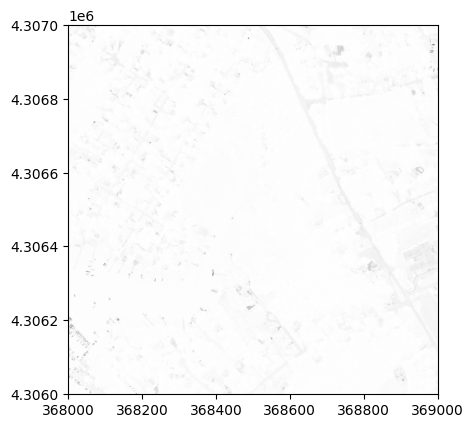

In [22]:
serc_plot = plt.imshow(b56,extent=serc_ext,cmap='Greys') 


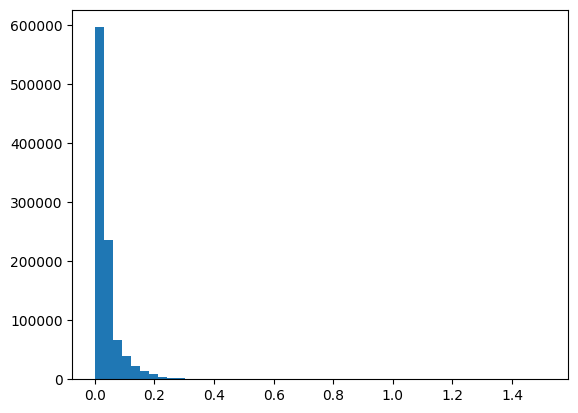

In [23]:
plt.hist(b56[~np.isnan(b56)],50); #50 signifies the # of bins


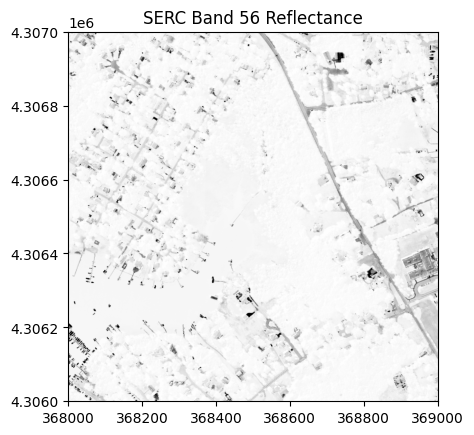

In [24]:
serc_plot = plt.imshow(b56,extent=serc_ext,cmap='Greys',clim=(0,0.4)) 
plt.title('SERC Band 56 Reflectance');

In [25]:
from skimage import exposure
# from IPython.html.widgets import *

def linearStretch(percent):
    pLow, pHigh = np.percentile(b56[~np.isnan(b56)], (percent,100-percent))
    img_rescale = exposure.rescale_intensity(b56, in_range=(pLow,pHigh))
    plt.imshow(img_rescale,extent=serc_ext,cmap='gist_earth') 
    #cbar = plt.colorbar(); cbar.set_label('Reflectance')
    plt.title('SERC Band 56 \n Linear ' + str(percent) + '% Contrast Stretch'); 
    ax = plt.gca()
    ax.ticklabel_format(useOffset=False, style='plain') #do not use scientific notation #
    rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90) #rotate x tick labels 90 degree
    


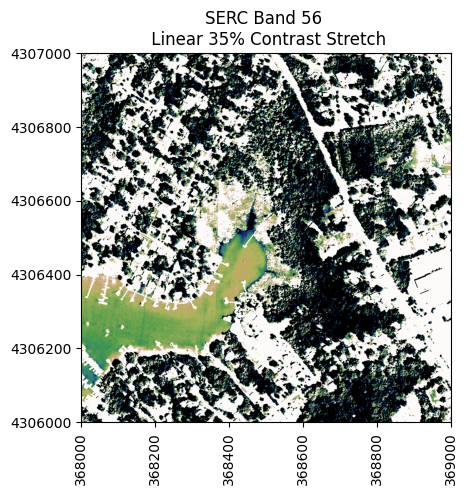

In [26]:
linearStretch(35)

# Part II

In [30]:
import os
import sys
import time

In [31]:
# function to download data stored on the internet in a public url to a local file
def download_url(url,download_dir):
    if not os.path.isdir(download_dir):
        os.makedirs(download_dir)
    filename = url.split('/')[-1]
    r = requests.get(url, allow_redirects=True)
    file_object = open(os.path.join(download_dir,filename),'wb')
    file_object.write(r.content)

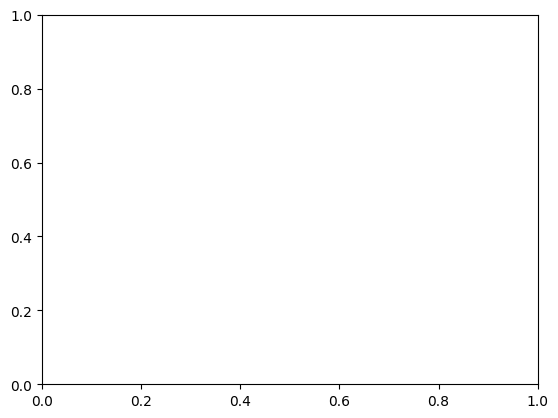

In [32]:
module_url = "https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/tutorials/Python/AOP/aop_python_modules/neon_aop_hyperspectral.py"
download_url(module_url,'../python_modules')
# os.listdir('../python_modules') #optionally show the contents of this directory to confirm the file downloaded

sys.path.insert(0, '../python_modules')
# import the neon_aop_hyperspectral module, the semicolon supresses an empty plot from displaying
import neon_aop_hyperspectral as neon_hs;

In [33]:
help(neon_hs.aop_h5refl2array)
# neon_hs.aop_h5refl2array? #uncomment for an alternate way to show the help

Help on function aop_h5refl2array in module neon_aop_hyperspectral:

aop_h5refl2array(h5_filename, raster_type_: Literal['Cast_Shadow', 'Data_Selection_Index', 'GLT_Data', 'Haze_Cloud_Water_Map', 'IGM_Data', 'Illumination_Factor', 'OBS_Data', 'Radiance', 'Reflectance', 'Sky_View_Factor', 'to-sensor_Azimuth_Angle', 'to-sensor_Zenith_Angle', 'Visibility_Index_Map', 'Weather_Quality_Indicator'], only_metadata=False)
    read in NEON AOP reflectance hdf5 file and return the un-scaled
    reflectance array, associated metadata, and wavelengths

    Parameters
    ----------
        h5_filename : string
            reflectance hdf5 file name, including full or relative path
        raster : string
            name of raster value to read in; this will typically be the reflectance data,
            but other data stored in the h5 file can be accessed as well
            valid options:
                Cast_Shadow (ATCOR input)
                Data_Selection_Index
                GLT_Data
     

In [34]:
# define the data_url to point to the cloud storage location of the the hyperspectral hdf5 data file
data_url = "https://storage.googleapis.com/neon-aop-products/2021/FullSite/D03/2021_DSNY_6/L3/Spectrometer/Reflectance/NEON_D03_DSNY_DP3_454000_3113000_reflectance.h5"


In [36]:
# download the h5 data and display how much time it took to download (uncomment 1st and 3rd lines)
# start_time = time.time()
download_url(data_url,'../data/neon/data')
# print("--- It took %s seconds to download the data ---" % round((time.time() - start_time),1))

In [38]:
# display the contents in the ./data folder to confirm the download completed
os.listdir('../data/neon/data')

['NEON_D03_DSNY_DP3_454000_3113000_reflectance.h5']

In [40]:
# read the h5 reflectance file (including the full path) to the variable h5_file_name
h5_file_name = data_url.split('/')[-1]
h5_tile = os.path.join('../data/neon/data',h5_file_name)
print(f'h5_tile: {h5_tile}')

h5_tile: ../data/neon/data/NEON_D03_DSNY_DP3_454000_3113000_reflectance.h5


In [41]:
# read in the reflectance data using the aop_h5refl2array function, this may also take a bit of time
start_time = time.time()
refl, refl_metadata, wavelengths = neon_hs.aop_h5refl2array(h5_tile,'Reflectance')
print("--- It took %s seconds to read in the data ---" % round((time.time() - start_time),0))


Reading in  ../data/neon/data/NEON_D03_DSNY_DP3_454000_3113000_reflectance.h5
--- It took 4.0 seconds to read in the data ---


In [42]:
# display the reflectance metadata dictionary contents
refl_metadata

{'shape': (1000, 1000, 426),
 'no_data_value': -9999.0,
 'scale_factor': 10000.0,
 'bad_band_window1': array([1340, 1445], dtype=int32),
 'bad_band_window2': array([1790, 1955], dtype=int32),
 'projection': b'+proj=UTM +zone=17 +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
 'EPSG': 32617,
 'res': {'pixelWidth': 1.0, 'pixelHeight': 1.0},
 'extent': (454000.0, 455000.0, 3113000.0, 3114000.0),
 'ext_dict': {'xMin': 454000.0,
  'xMax': 455000.0,
  'yMin': 3113000.0,
  'yMax': 3114000.0},
 'source': '../data/neon/data/NEON_D03_DSNY_DP3_454000_3113000_reflectance.h5'}

In [43]:
# display the first 5 values of the wavelengths
wavelengths[:5]

array([383.884 , 388.8917, 393.8995, 398.9072, 403.915 ], dtype=float32)

In [44]:
refl.shape

(1000, 1000, 426)

In [45]:
band56 = refl[:,:,55]

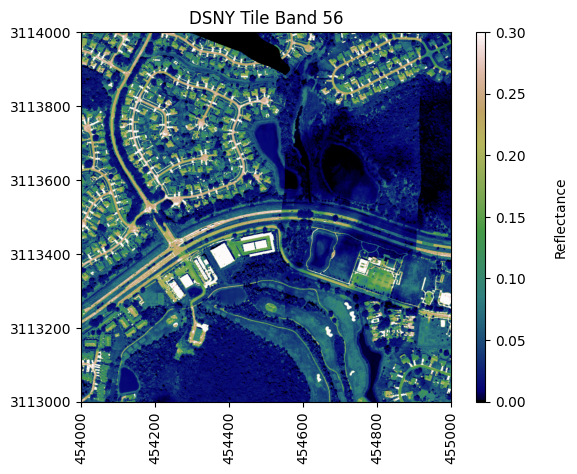

In [46]:
neon_hs.plot_aop_refl(band56/refl_metadata['scale_factor'],
                      refl_metadata['extent'],
                      colorlimit=(0,0.3),
                      title='DSNY Tile Band 56',
                      cmap_title='Reflectance',
                      colormap='gist_earth')

In [47]:
# pull out the true-color band combinations
rgb_bands = (58,34,19) # set the red, green, and blue bands

# stack the 3-band combinations (rgb and cir) using stack_rgb function
rgb_unscaled = neon_hs.stack_rgb(refl,rgb_bands)

# apply the reflectance scale factor
rgb = rgb_unscaled/refl_metadata['scale_factor']

In [48]:
print('Center wavelengths:')
print('Band 58: %.1f' %(wavelengths[57]),'nm')
print('Band 33: %.1f' %(wavelengths[33]),'nm')
print('Band 19: %.1f' %(wavelengths[18]),'nm')

Center wavelengths:
Band 58: 669.3 nm
Band 33: 549.1 nm
Band 19: 474.0 nm


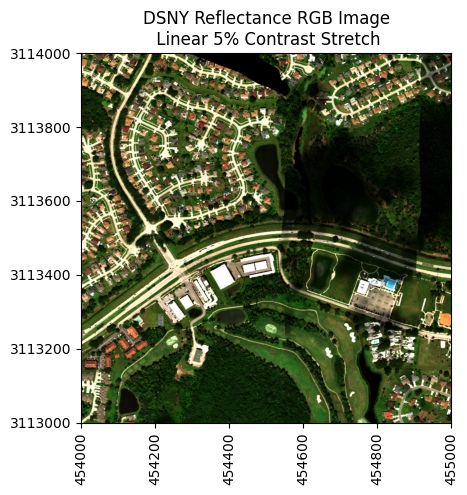

In [49]:
# plot the true color image (rgb)
neon_hs.plot_aop_rgb(rgb,
                     refl_metadata['extent'],
                     plot_title='DSNY Reflectance RGB Image')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..32767].


Band 90 Center Wavelength = 829.6 nm
Band 34 Center Wavelength = 549.1 nm
Band 19 Center Wavelength = 474.0 nm


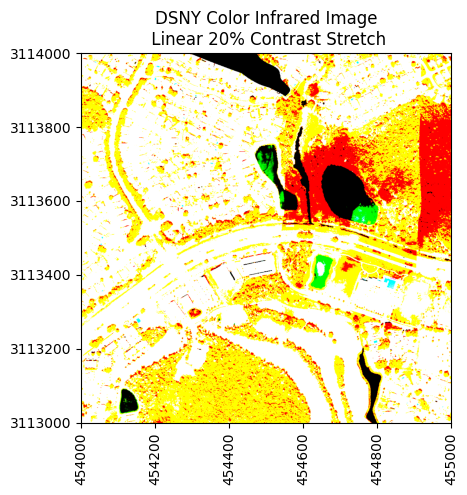

In [50]:
cir_bands = (90,34,19)
print('Band 90 Center Wavelength = %.1f' %(wavelengths[89]),'nm')
print('Band 34 Center Wavelength = %.1f' %(wavelengths[33]),'nm')
print('Band 19 Center Wavelength = %.1f' %(wavelengths[18]),'nm')

cir = neon_hs.stack_rgb(refl,cir_bands)
neon_hs.plot_aop_rgb(cir,
                     refl_metadata['extent'],
                     ls_pct=20,
                     plot_title='DSNY Color Infrared Image')

# Part III

In [59]:
import pandas as pd

In [51]:
module_url = "https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/tutorials/Python/AOP/aop_python_modules/neon_aop_hyperspectral.py"
download_url(module_url,'../python_modules')
# os.listdir('../python_modules') #optionally show the contents of this directory to confirm the file downloaded

sys.path.insert(0, '../python_modules')
# import the neon_aop_hyperspectral module, the semicolon supresses an empty plot from displaying
import neon_aop_hyperspectral as neon_hs;

In [52]:
# define the data_url to point to the cloud storage location of the the hyperspectral hdf5 data file
data_url = "https://storage.googleapis.com/neon-aop-products/2021/FullSite/D02/2021_SERC_5/L3/Spectrometer/Reflectance/NEON_D02_SERC_DP3_368000_4306000_reflectance.h5"

In [53]:
# download the h5 data
download_url(data_url,'../data/neon/data')

In [55]:
# read the h5 reflectance file (including the full path) to the variable h5_file_name
h5_file_name = data_url.split('/')[-1]
h5_tile = os.path.join("../data/neon/data",h5_file_name)

# read in the data using the neon_hs module
serc_refl, serc_refl_md, wavelengths = neon_hs.aop_h5refl2array(h5_tile,'Reflectance')

Reading in  ../data/neon/data/NEON_D02_SERC_DP3_368000_4306000_reflectance.h5


In [56]:
for item in sorted(serc_refl_md):
    print(item + ':',serc_refl_md[item])

print('\nSERC Tile Reflectance Stats:')
print('min:',np.nanmin(serc_refl))
print('max:',round(np.nanmax(serc_refl),2))
print('mean:',round(np.nanmean(serc_refl),2))

EPSG: 32618
bad_band_window1: [1340 1445]
bad_band_window2: [1790 1955]
ext_dict: {'xMin': 368000.0, 'xMax': 369000.0, 'yMin': 4306000.0, 'yMax': 4307000.0}
extent: (368000.0, 369000.0, 4306000.0, 4307000.0)
no_data_value: -9999.0
projection: b'+proj=UTM +zone=18 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'
res: {'pixelWidth': 1.0, 'pixelHeight': 1.0}
scale_factor: 10000.0
shape: (1000, 1000, 426)
source: ../data/neon/data/NEON_D02_SERC_DP3_368000_4306000_reflectance.h5

SERC Tile Reflectance Stats:
min: -100
max: 15459
mean: 1324.72


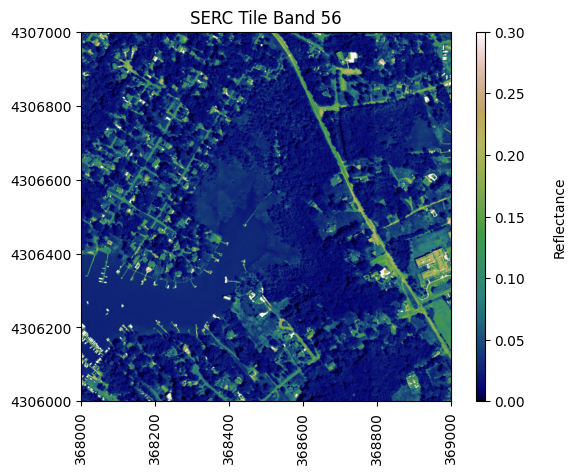

In [57]:
sercb56 = serc_refl[:,:,55]/serc_refl_md['scale_factor']

neon_hs.plot_aop_refl(sercb56,
                      serc_refl_md['extent'],
                      colorlimit=(0,0.3),
                      title='SERC Tile Band 56',
                      cmap_title='Reflectance',
                      colormap='gist_earth')

In [60]:
serc_pixel_df = pd.DataFrame()
serc_pixel_df['reflectance'] = serc_refl[500,500,:]/serc_refl_md['scale_factor']
serc_pixel_df['wavelengths'] = wavelengths

In [61]:
print(serc_pixel_df.head(5))
print(serc_pixel_df.tail(5))

   reflectance  wavelengths
0       0.0641   383.884003
1       0.0544   388.891693
2       0.0426   393.899506
3       0.0384   398.907196
4       0.0341   403.915009
     reflectance  wavelengths
421       1.4949  2492.149414
422       1.4948  2497.157227
423       0.6192  2502.165039
424       1.4922  2507.172607
425       1.4922  2512.180420


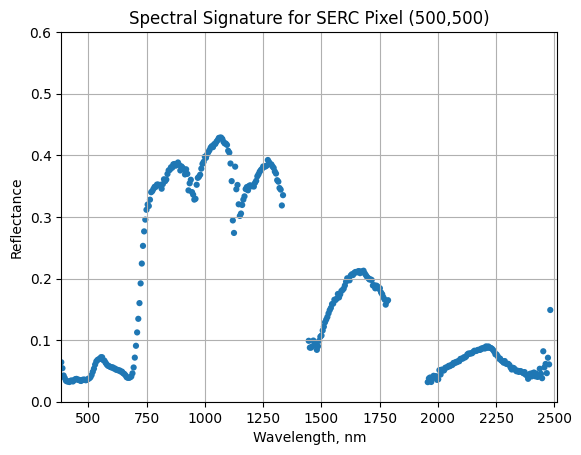

In [62]:
serc_pixel_df.plot(x='wavelengths',y='reflectance',kind='scatter',edgecolor='none')
plt.title('Spectral Signature for SERC Pixel (500,500)')
ax = plt.gca() 
ax.set_xlim([np.min(serc_pixel_df['wavelengths']),np.max(serc_pixel_df['wavelengths'])])
ax.set_ylim(0,0.6)
ax.set_xlabel("Wavelength, nm")
ax.set_ylabel("Reflectance")
ax.grid('on')

In [63]:
bbw1 = serc_refl_md['bad_band_window1']; 
bbw2 = serc_refl_md['bad_band_window2']; 
print('Bad Band Window 1:',bbw1)
print('Bad Band Window 2:',bbw2)

Bad Band Window 1: [1340 1445]
Bad Band Window 2: [1790 1955]


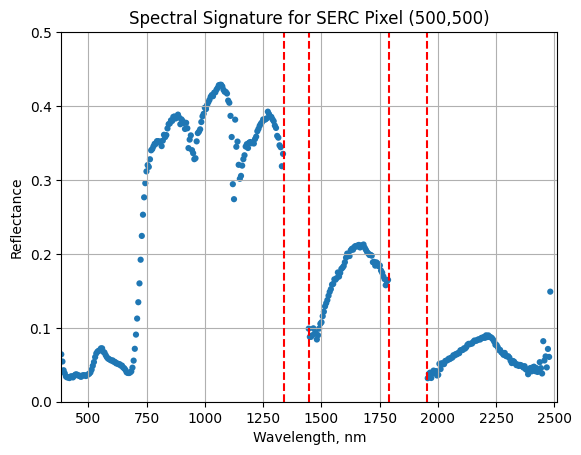

In [64]:
serc_pixel_df.plot(x='wavelengths',y='reflectance',kind='scatter',edgecolor='none');
plt.title('Spectral Signature for SERC Pixel (500,500)')
ax1 = plt.gca(); ax1.grid('on')
ax1.set_xlim([np.min(serc_pixel_df['wavelengths']),np.max(serc_pixel_df['wavelengths'])]); 
ax1.set_ylim(0,0.5)
ax1.set_xlabel("Wavelength, nm"); ax1.set_ylabel("Reflectance")

#Add in red dotted lines to show boundaries of bad band windows:
ax1.plot((1340,1340),(0,1.5), 'r--');
ax1.plot((1445,1445),(0,1.5), 'r--');
ax1.plot((1790,1790),(0,1.5), 'r--');
ax1.plot((1955,1955),(0,1.5), 'r--');

In [65]:
w = wavelengths.copy() #make a copy to deal with the mutable data type
w[((w >= 1340) & (w <= 1445)) | ((w >= 1790) & (w <= 1955))]=np.nan #can also use bbw1[0] or bbw1[1] to avoid hard-coding in
w[-10:]=np.nan;  # the last 10 bands sometimes have noise - best to eliminate
#print(w) #optionally print wavelength values to show that -9999 values are replaced with nan

In [72]:
#define refl_band, refl, and metadata, as copies of the original serc_refl data
refl_band = sercb56
refl = serc_refl.copy()
metadata = serc_refl_md.copy()

from ipywidgets import interact

def interactive_spectra_plot(pixel_x,pixel_y):

    reflectance = refl[pixel_y,pixel_x,:]
    
    pixel_df = pd.DataFrame()
    pixel_df['reflectance'] = reflectance
    pixel_df['wavelengths'] = w

    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(1,2,1)

    # fig, axes = plt.subplots(nrows=1, ncols=2)
    pixel_df.plot(ax=ax1,x='wavelengths',y='reflectance',kind='scatter',edgecolor='none');
    ax1.set_title('Spectra of Pixel (' + str(pixel_x) + ',' + str(pixel_y) + ')')
    ax1.set_xlim([np.min(wavelengths),np.max(wavelengths)]); 
    ax1.set_ylim([np.min(pixel_df['reflectance']),np.max(pixel_df['reflectance']*1.1)])
    ax1.set_xlabel("Wavelength, nm"); ax1.set_ylabel("Reflectance")
    ax1.grid('on')

    ax2 = fig.add_subplot(1,2,2)
    plot = plt.imshow(refl_band,extent=metadata['extent'],clim=(0,0.1)); 
    plt.title('Pixel Location'); 
    cbar = plt.colorbar(plot,aspect=20); plt.set_cmap('gist_earth'); 
    cbar.set_label('Reflectance',rotation=90,labelpad=20); 
    ax2.ticklabel_format(useOffset=False, style='plain') #do not use scientific notation 
    rotatexlabels = plt.setp(ax2.get_xticklabels(),rotation=90) #rotate x tick labels 90 degrees
    
    ax2.plot(metadata['extent'][0]+pixel_x,metadata['extent'][3]-pixel_y,'s',markersize=5,color='red')
    ax2.set_xlim(metadata['extent'][0],metadata['extent'][1])
    ax2.set_ylim(metadata['extent'][2],metadata['extent'][3])
    
interact(interactive_spectra_plot, pixel_x = (0,refl.shape[1]-1,1),pixel_y=(0,refl.shape[0]-1,1));

interactive(children=(IntSlider(value=499, description='pixel_x', max=999), IntSlider(value=499, description='…

# Part IV

In [74]:
# define the data_url to point to the cloud storage location of the the hyperspectral hdf5 data file
data_url = "https://storage.googleapis.com/neon-aop-products/2021/FullSite/D02/2021_SERC_5/L3/Spectrometer/Reflectance/NEON_D02_SERC_DP3_368000_4306000_reflectance.h5"

In [75]:
# download the h5 data and display how much time it took to download (uncomment 1st and 3rd lines)
# start_time = time.time()
download_url(data_url,'../data/neon/data')
# print("--- It took %s seconds to download the data ---" % round((time.time() - start_time),1))

In [76]:
# read the h5 reflectance file (including the full path) to the variable h5_file_name
h5_file_name = data_url.split('/')[-1]
h5_tile = os.path.join("../data/neon/data",h5_file_name)
print(f'h5_tile: {h5_tile}')

h5_tile: ../data/neon/data/NEON_D02_SERC_DP3_368000_4306000_reflectance.h5


In [77]:
# Note you will need to update this filepath for your local machine
serc_refl, serc_refl_md, wavelengths = neon_hs.aop_h5refl2array(h5_tile,'Reflectance')

Reading in  ../data/neon/data/NEON_D02_SERC_DP3_368000_4306000_reflectance.h5


In [78]:
print('band 58 center wavelength (nm): ', wavelengths[57])
print('band 90 center wavelength (nm) : ', wavelengths[89])

band 58 center wavelength (nm):  669.3261
band 90 center wavelength (nm) :  829.5743


In [79]:
vis = serc_refl[:,:,57]
nir = serc_refl[:,:,89]

# handle a divide by zero by setting the numpy errstate as follows
with np.errstate(divide='ignore', invalid='ignore'):
    ndvi = np.true_divide((nir-vis),(nir+vis))
    ndvi[ndvi == np.inf] = 0
    ndvi = np.nan_to_num(ndvi)

In [80]:
print(f'NDVI Min: {ndvi.min()}')
print(f'NDVI Mean: {round(ndvi.mean(),2)}')
print(f'NDVI Max: {ndvi.max()}')

NDVI Min: -1.0
NDVI Mean: 0.63
NDVI Max: 1.0


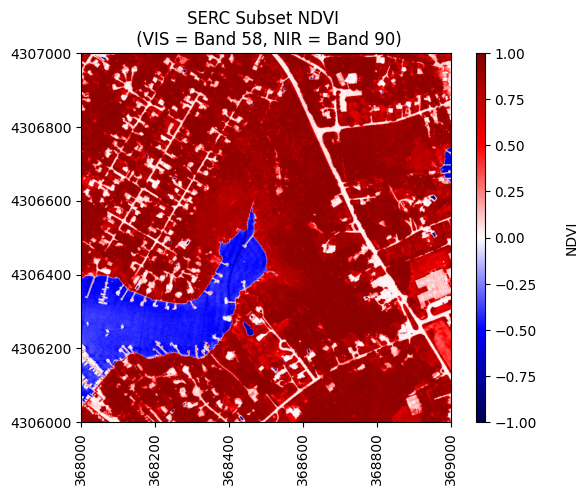

In [81]:
neon_hs.plot_aop_refl(ndvi,serc_refl_md['extent'],
                      colorlimit = (np.min(ndvi),np.max(ndvi)),
                      title='SERC Subset NDVI \n (VIS = Band 58, NIR = Band 90)',
                      cmap_title='NDVI',
                      colormap='seismic')

In [82]:
# make a copy of ndvi
ndvi_gtpt6 = ndvi.copy()
#set all pixels with NDVI < 0.6 to nan, keeping only values > 0.6
ndvi_gtpt6[ndvi<0.6] = np.nan  
print('Mean NDVI > 0.6:',round(np.nanmean(ndvi_gtpt6),2))

Mean NDVI > 0.6: 0.87


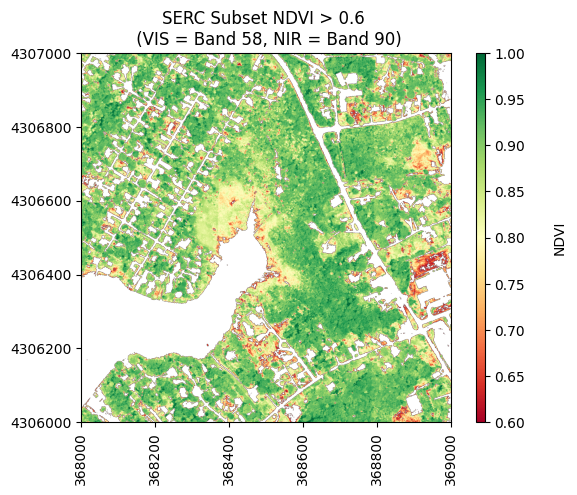

In [83]:
neon_hs.plot_aop_refl(ndvi_gtpt6,
                      serc_refl_md['extent'],
                      colorlimit=(0.6,1),
                      title='SERC Subset NDVI > 0.6 \n (VIS = Band 58, NIR = Band 90)',
                      cmap_title='NDVI',
                      colormap='RdYlGn')

In [84]:
import numpy.ma as ma
def calculate_mean_masked_spectra(refl_array,ndvi,ndvi_threshold,ineq='>'):
    mean_masked_refl = np.zeros(refl_array.shape[2])
    for i in np.arange(refl_array.shape[2]):
        refl_band = refl_array[:,:,i]
        if ineq == '>':
            ndvi_mask = ma.masked_where((ndvi<=ndvi_threshold) | (np.isnan(ndvi)),ndvi)
        elif ineq == '<':
            ndvi_mask = ma.masked_where((ndvi>=ndvi_threshold) | (np.isnan(ndvi)),ndvi)   
        else:
            print('ERROR: Invalid inequality. Enter < or >')
        masked_refl = ma.MaskedArray(refl_band,mask=ndvi_mask.mask)
        mean_masked_refl[i] = ma.mean(masked_refl)
    return mean_masked_refl


In [85]:
serc_ndvi_gtpt6 = calculate_mean_masked_spectra(serc_refl,ndvi,0.6)
serc_ndvi_ltpt3 = calculate_mean_masked_spectra(serc_refl,ndvi,0.3,ineq='<') 

In [86]:
#Remove water vapor bad band windows & last 10 bands 
w = wavelengths.copy()
w[((w >= 1340) & (w <= 1445)) | ((w >= 1790) & (w <= 1955))]=np.nan
w[-10:]=np.nan;  

nan_ind = np.argwhere(np.isnan(w))

serc_ndvi_gtpt6[nan_ind] = np.nan
serc_ndvi_ltpt3[nan_ind] = np.nan

#Create dataframe with masked NDVI mean spectra, scale by the reflectance scale factor
serc_ndvi_df = pd.DataFrame()
serc_ndvi_df['wavelength'] = w
serc_ndvi_df['mean_refl_ndvi_gtpt6'] = serc_ndvi_gtpt6/serc_refl_md['scale_factor']
serc_ndvi_df['mean_refl_ndvi_ltpt3'] = serc_ndvi_ltpt3/serc_refl_md['scale_factor']

In [87]:
serc_ndvi_df.head()


,wavelength,mean_refl_ndvi_gtpt6,mean_refl_ndvi_ltpt3
0,383.884003,0.055741,0.119835
1,388.891693,0.036432,0.090972
2,393.899506,0.027002,0.076867
3,398.907196,0.022841,0.072207
4,403.915009,0.018748,0.065984


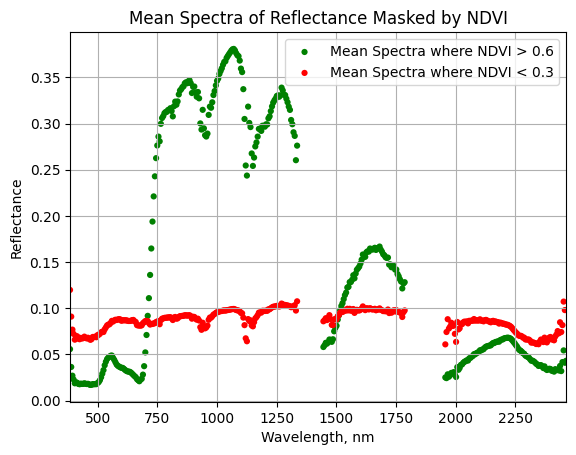

In [88]:
ax = plt.gca();
serc_ndvi_df.plot(ax=ax,x='wavelength',y='mean_refl_ndvi_gtpt6',color='green',
                  edgecolor='none',kind='scatter',label='Mean Spectra where NDVI > 0.6',legend=True);
serc_ndvi_df.plot(ax=ax,x='wavelength',y='mean_refl_ndvi_ltpt3',color='red',
                  edgecolor='none',kind='scatter',label='Mean Spectra where NDVI < 0.3',legend=True);
ax.set_title('Mean Spectra of Reflectance Masked by NDVI')
ax.set_xlim([np.nanmin(w),np.nanmax(w)]);
ax.set_xlabel("Wavelength, nm"); ax.set_ylabel("Reflectance")
ax.grid('on'); 
